In [1]:
# install tensorflow

!pip install tensorflow==2.2.0rc0

In [2]:
# checking a verion of the tensorflow

import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [43]:
# import all the dependencies

import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

In [4]:
!wget https://raw.githubusercontent.com/s-kav/IBM-Watsom-capstone-project/master/Temp_England_1723_2019.csv

--2020-06-02 13:14:27--  https://raw.githubusercontent.com/s-kav/IBM-Watsom-capstone-project/master/Temp_England_1723_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28767 (28K) [text/plain]
Saving to: ‘Temp_England_1723_2019.csv’

100%[======================================>] 28,767      --.-K/s   in 0.001s  

2020-06-02 13:14:27 (19.7 MB/s) - ‘Temp_England_1723_2019.csv’ saved [28767/28767]



In [91]:
# index_col = 'Year', 
DS_temp = pd.read_csv('Temp_England_1723_2019.csv', sep = ',', engine = 'python', encoding = 'latin1', usecols = [i for i in range(13)])

In [92]:
DS_temp = DS_temp.drop(DS_temp.tail(1).index) # delete the last row with NaN values

In [93]:
DS_temp.last_valid_index()

296

In [94]:
DS_temp.dtypes.value_counts()

float64    13
dtype: int64

In [95]:
DS_temp.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1723.0,1.1,4.4,7.5,8.9,11.7,15.0,15.3,15.6,13.3,11.1,7.5,5.8
1,1724.0,5.6,4.2,4.7,7.2,11.4,15.3,15.0,16.2,14.4,8.6,5.3,3.3
2,1725.0,4.4,3.3,5.0,8.1,10.8,12.2,13.8,13.3,12.8,9.4,6.9,3.9
3,1726.0,1.1,4.2,4.2,8.4,13.4,16.4,16.0,15.6,14.7,10.2,6.1,1.8
4,1727.0,4.2,5.0,5.1,9.2,13.6,14.9,16.9,16.9,14.4,10.8,4.7,3.6


In [98]:
DS_temp["Year"] = DS_temp["Year"].astype('int') # transformation of the first column as year (int)

In [99]:
DS_temp.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1723,1.1,4.4,7.5,8.9,11.7,15.0,15.3,15.6,13.3,11.1,7.5,5.8
1,1724,5.6,4.2,4.7,7.2,11.4,15.3,15.0,16.2,14.4,8.6,5.3,3.3
2,1725,4.4,3.3,5.0,8.1,10.8,12.2,13.8,13.3,12.8,9.4,6.9,3.9
3,1726,1.1,4.2,4.2,8.4,13.4,16.4,16.0,15.6,14.7,10.2,6.1,1.8
4,1727,4.2,5.0,5.1,9.2,13.6,14.9,16.9,16.9,14.4,10.8,4.7,3.6


In [113]:
DS_temp.columns

Index(['Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [115]:
DS_temp.columns[1:13]

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [100]:
DS_temp_np = np.array(DS_temp)

In [109]:
DS_temp_np

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [107]:
DS_temp_np[:,0]

array([1723., 1724., 1725., 1726., 1727., 1728., 1729., 1730., 1731.,
       1732., 1733., 1734., 1735., 1736., 1737., 1738., 1739., 1740.,
       1741., 1742., 1743., 1744., 1745., 1746., 1747., 1748., 1749.,
       1750., 1751., 1752., 1753., 1754., 1755., 1756., 1757., 1758.,
       1759., 1760., 1761., 1762., 1763., 1764., 1765., 1766., 1767.,
       1768., 1769., 1770., 1771., 1772., 1773., 1774., 1775., 1776.,
       1777., 1778., 1779., 1780., 1781., 1782., 1783., 1784., 1785.,
       1786., 1787., 1788., 1789., 1790., 1791., 1792., 1793., 1794.,
       1795., 1796., 1797., 1798., 1799., 1800., 1801., 1802., 1803.,
       1804., 1805., 1806., 1807., 1808., 1809., 1810., 1811., 1812.,
       1813., 1814., 1815., 1816., 1817., 1818., 1819., 1820., 1821.,
       1822., 1823., 1824., 1825., 1826., 1827., 1828., 1829., 1830.,
       1831., 1832., 1833., 1834., 1835., 1836., 1837., 1838., 1839.,
       1840., 1841., 1842., 1843., 1844., 1845., 1846., 1847., 1848.,
       1849., 1850.,

In [71]:
DS_temp_np.shape

(297, 13)

In [70]:
DS_temp.shape

(297, 13)

Text(0.5, 0.92, 'Lorenz Attractor')

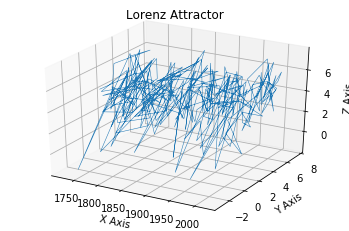

In [112]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.plot(np.array(DS_temp.iloc[:,0]), np.array(DS_temp.iloc[:,1]), np.array(DS_temp.iloc[:,:]), lw = 0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

In [188]:
x = np.arange(1, 298, 1)
y = np.arange(1, 13, 1)
zgrid = DS_temp_np[x[1], y[1]]
zgrid
#x[1].astype('float')

3.3

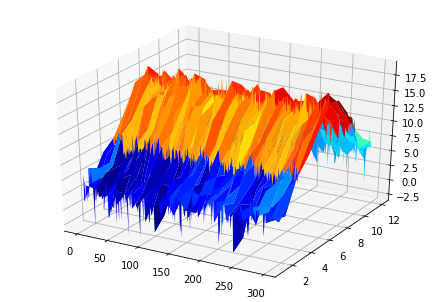

In [201]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# fig = plt.figure()
# ax = Axes3D(fig)

# x = DS_temp_np[:,0]
# y = DS_temp.columns[1:13]
# # put 0s on the y-axis, and put the y axis on the z-axis
# ax.plot(xs=x, ys=y), zs=y, zdir='z', label='ys=0, zdir=z')
# plt.show()

# отдельная функция, в которой задаются x, y, z
def MD():
        x = np.array(DS_temp.iloc[:,0].index)
        y = np.arange(1, 13, 1)# .astype('float')
        #y = np.array(DS_temp.columns[1:13])
        xgrid, ygrid = np.meshgrid(x, y)
        zgrid = DS_temp_np[xgrid, ygrid]
        return xgrid, ygrid, zgrid

# вызов этой функции и дальше рисуем 3D график
x, y, z = MD()

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(x, y, z, rstride=3, cstride=5, cmap=cm.jet)

plt.show()
# fig.savefig('5c.png')